# PyStata demonstration 10/5

## Configuration

#### 1. Use the Python module stata_setup
Install stata_setup

In [1]:
import stata_setup
stata_setup.config("C:/Program Files/Stata17", "mp")


  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user 4-core network perpetual
Serial number: 17
  Licensed to: Meghan Cain
               StataCorp LLC

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000; see help set_maxvar.


#### 2. Add pystata’s location to Python’s module search path

In [ ]:
import sys
sys.path.append('C:/Program Files/Stata17/utilities')
from pystata import config
config.init('mp')

#### 3. Change the current working directory to pystata’s location

In [ ]:
import os
os.chdir('C:/Program Files/Stata17/utilities')
from pystata import config
config.init('mp')

#### 4. Permanently add pystata’s location to Python’s module search path
For Windows 10 users, click: **Control Panel > System and Security > System > Advanced system settings > Environment Variables** <br>
Add a new user variable named PYTHONPATH, specified as STATA_SYSDIR\utilities

For Linux and Mac OS X users, you can set it permanently in your ~/.bashrc or ~/.bash_profile file: 
export PYTHONPATH=STATA_SYSDIR/utilities:$PYTHONPATH

or in your ~/.cshrc file,
setenv PYTHONPATH STATA_SYSDIR\utilities:${PYTHONPATH}

In [ ]:
from pystata import config
config.init('mp')

## Load modules

In [7]:
from pystata import stata, config
import pandas as pd
import numpy as np
from IPython.display import HTML, display

## PyStata magic demonstration

In [2]:
#verify configuration
%pystata status
#The default is a 5.5-inch width and 4-inch height.

    System information
      Python version         3.9.7
      Stata version          Stata 17.0 (MP)
      Stata library path     C:\Program Files\Stata17\mp-64.dll
      Stata initialized      True
      sfi initialized        True

    Settings
      graphic display        True
      graphic size           width = default, height = default
      graphic format         svg


In [3]:
%pystata set graph_size w 6
%pystata set graph_format png
%pystata status

    System information
      Python version         3.9.7
      Stata version          Stata 17.0 (MP)
      Stata library path     C:\Program Files\Stata17\mp-64.dll
      Stata initialized      True
      sfi initialized        True

    Settings
      graphic display        True
      graphic size           width = 6in, height = default
      graphic format         png


## Stata magic demonstration

In [4]:
%stata sysuse auto

(1978 automobile data)



. scatter mpg weight

. regress mpg weight i.foreign

      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(2, 71)        =     69.75
       Model |   1619.2877         2  809.643849   Prob > F        =    0.0000
    Residual |  824.171761        71   11.608053   R-squared       =    0.6627
-------------+----------------------------------   Adj R-squared   =    0.6532
       Total |  2443.45946        73  33.4720474   Root MSE        =    3.4071

------------------------------------------------------------------------------
         mpg | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      weight |  -.0065879   .0006371   -10.34   0.000    -.0078583   -.0053175
             |
     foreign |
    Foreign  |  -1.650029   1.075994    -1.53   0.130      -3.7955    .4954422
       _cons |    41.6797   2.165547    19.25

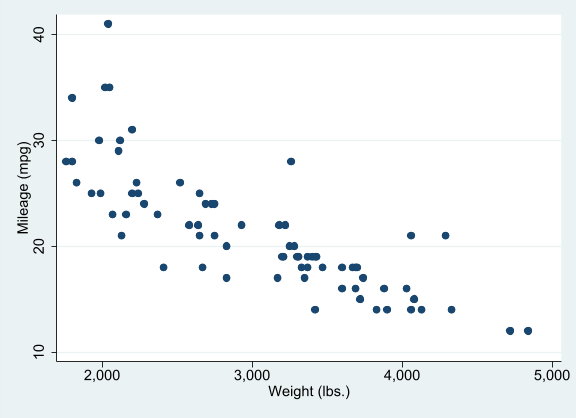

In [5]:
%%stata
scatter mpg weight
regress mpg weight i.foreign

### Efficacy of a new hospital procedure: A DID analysis

The following analysis will use difference-in-differences (DID) regression to estimate the effect of a new admissions procedure on the hospitals that participated in the program.

To answer this question, we will use monthly data on patients from January to July. The new admissions procedure was implemented in April by hospitals that were under new management. Of the 46 hospitals in the study, 18 implemented the new procedure.

We would like to fit the following model to our data:

$$ satisfaction = \hat{\gamma}_{s} + \hat{\gamma}_{t} + \hat{\delta}procedure_{st} + \varepsilon_{ist} $$

where $\hat{\gamma}_{s}$ are the hospital fixed effects, $\hat{\gamma}_{t}$ are the month fixed effects, and ${\varepsilon}_{ist}$ is the error term.

In [8]:
#import data
dfpd = pd.read_csv ('hospdd.csv')

In [9]:
%%stata -d dfpd -force
table frequency (procedure result), statistic(mean satis) statistic(sd satis) total(procedure) ///
nformat(%4.2f) sformat("(%s)" sd) style(table-1) label(hosp_lab)


. table frequency (procedure result), statistic(mean satis) statistic(sd satis)
>  total(procedure) ///
> nformat(%4.2f) sformat("(%s)" sd) style(table-1) label(hosp_lab)

------------------------------------------------
                |       Admission procedure     
                |       New             Old     
----------------+-------------------------------
Visit frequency |                               
         High   |  4.88   (1.14)   3.49   (0.95)
          Low   |  4.11   (0.99)   3.45   (0.95)
       Medium   |  3.91   (1.00)   3.34   (0.96)
    Very high   |  4.72   (1.03)   3.42   (0.94)
        Total   |  4.36   (1.10)   3.42   (0.95)
------------------------------------------------

. 


In [10]:
%stata collect export did.html, replace
display(HTML(filename = 'did.html'), metadata=dict(isolated=True))


(collection Table exported to file did.html)


In [11]:
%stata didregress (satis) (proc), group(hospital) time(month)


Number of groups and treatment time

Time variable: month
Control:       proc = 0
Treatment:     proc = 1
-----------------------------------
             |   Control  Treatment
-------------+---------------------
Group        |
    hospital |        28         18
-------------+---------------------
Time         |
     Minimum |         1          4
     Maximum |         1          4
-----------------------------------

Difference-in-differences regression                     Number of obs = 7,368
Data type: Repeated cross-sectional

                              (Std. err. adjusted for 46 clusters in hospital)
------------------------------------------------------------------------------
             |               Robust
       satis | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
ATET         |
        proc |
   (1 vs 0)  |   .8479879   .0321121    26.41   0.000     .7833108     .9126

In [12]:
%stata ereturn list


scalars:
                  e(N) =  7368
               e(rank) =  7
            e(N_clust) =  46
               e(df_r) =  45
               e(tmin) =  4
               e(tmax) =  4

macros:
            e(cmdline) : "didregress (satis) (proc), group(hospital) time(m.."
            e(predict) : "didregress_p"
     e(treatment_type) : "binary"
          e(treatment) : "proc"
          e(data_type) : "Repeated cross-sectional"
          e(estat_cmd) : "didregress_estat"
                e(cmd) : "didregress"
            e(timevar) : "month"
           e(clustvar) : "hospital"
            e(vcetype) : "Robust"
                e(vce) : "cluster"
   e(_contrast_not_ok) : "_ALL"
       e(marginsnotok) : "_ALL"
          e(groupvars) : "hospital"
         e(properties) : "b V"
             e(depvar) : "satis"

matrices:
                  e(b) :  1 x 9
                  e(V) :  9 x 9
        e(group_count) :  3 x 3

functions:
             e(sample)   


In [13]:
%%stata -ret didret -eret dideret -qui
didregress (satis) (proc), group(hospital) time(month)

In [14]:
dideret

{'e(N)': 7368.0,
 'e(rank)': 7.0,
 'e(ngroups)': 1.0,
 'e(N_clust)': 46.0,
 'e(df_r)': 45.0,
 'e(tmin)': 4.0,
 'e(tmax)': 4.0,
 'e(mitiempo)': 1.0,
 'e(cmdline)': 'didregress (satis) (proc), group(hospital) time(month)',
 'e(predict)': 'didregress_p',
 'e(policytype)': 'binary',
 'e(treatment_type)': 'binary',
 'e(policy)': 'proc',
 'e(treatment)': 'proc',
 'e(data_type)': 'Repeated cross-sectional',
 'e(estat_cmd)': 'didregress_estat',
 'e(cmd)': 'didregress',
 'e(plist)': 'satis  i.month proc',
 'e(subcmd)': 'did',
 'e(timevar)': 'month',
 'e(absvar)': 'hospital',
 'e(clustvar)': 'hospital',
 'e(cmax)': '12',
 'e(treatname)': 'proc',
 'e(ynewname)': 'satis',
 'e(tecmd)': 'areg',
 'e(stripes)': ' ATET:r1vs0.proc Controls:1b.month Controls:2.month Controls:3.month Controls:4.month Controls:5.month Controls:6.month Controls:7.month Controls:_cons',
 'e(storig)': 'proc 1b.month 2.month 3.month 4.month 5.month 6.month 7.month _cons',
 'e(vcetype)': 'Robust',
 'e(vce)': 'cluster',
 'e(_con

In [15]:
dideret['e(group_count)']

array([[2.80000000e+001, 1.00000000e+000, 1.00000000e+000],
       [1.80000000e+001, 4.00000000e+000, 4.00000000e+000],
       [4.60000000e+001, 9.04552136e+307, 9.04552136e+307]])

In [16]:
dideret['e(group_count)'][0,0]

28.0

In [17]:
#print results using string interpolation
print("Of the %2.0f hospitals in this provider's network, %2.0f implemented the new admissions procedure. These hospitals had an \n%4.2f-point increase in patient satisfaction relative to the case where they do not implement the new policy (95%% CI [%4.3f, %4.3f])." 
      % (dideret['e(group_count)'][2][0], dideret['e(group_count)'][1][0], didret['r(table)'][0][0], didret['r(table)'][4,0], didret['r(table)'][5,0]))

Of the 46 hospitals in this provider's network, 18 implemented the new admissions procedure. These hospitals had an 
0.85-point increase in patient satisfaction relative to the case where they do not implement the new policy (95% CI [0.783, 0.913]).



. estat trendplots, scheme(economist)

. estat ptrend

Parallel-trends test (pretreatment time period)
H0: Linear trends are parallel

F(1, 45) =   0.55
Prob > F = 0.4615

. estat granger

Granger causality test
H0: No effect in anticipation of treatment

F(2, 45) =   0.33
Prob > F = 0.7239

. 


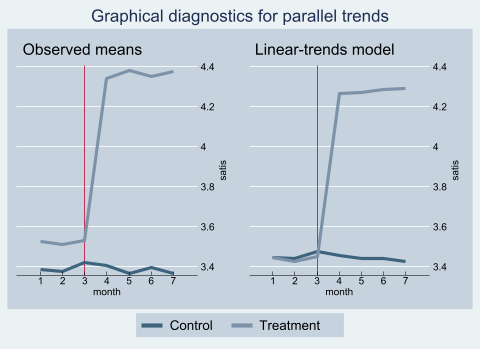

In [18]:
%%stata -gw 5
estat trendplots, scheme(economist)
estat ptrend
estat granger

In [19]:
%%stata -qui -nogr
estat trendplots, scheme(economist)
graph export ptrend.png, replace

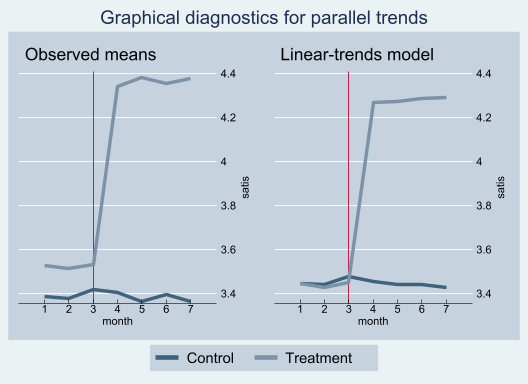

#### <center>Figure 1. Parallel trends plot</center>

Can also use html and adjust width/height
<img src="ptrend.png" alt="ptrend" width=500/>

### Risk of HIV infection: A survival analysis

The following analysis will use a semiparametric Cox proportional hazards model to estimate the influence of needle sharing on risk of HIV infection in interval-censored survival-time data. For each patient, we have recorded the date of their last doctor visit prior to infection (ltime) and their first visit with a positive test result (rtime). It is unknown at what precise time they were infected in between visits. 

We would like to fit the following model for the hazard function of the HIV infection time:

$$ h(t;needle) = h_{0}(t)exp({\beta_{1}}needle) $$

where $\beta_{1}$ is the regression coefficient for $needle$ and $h_{0}(t)$ is an arbitrary baseline hazard function.

In [20]:
#import data
dfnp = np.loadtxt('idu.txt')

In [21]:
%%stata -d dfnp -force
summarize


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
          v1 |      1,124    31.46174    7.699114         17         52
          v2 |      1,124    .9323843     .251197          0          1
          v3 |      1,124    .3576512    .4795221          0          1
          v4 |      1,124    .6690391    .4707685          0          1
          v5 |      1,124    .3718861    .4835234          0          1
-------------+---------------------------------------------------------
          v6 |      1,124    24.17476    11.77005          0   42.52459
          v7 |      1,124   -879.1146    327.4094       -999   39.93443
          v8 |      1,124    2.18e-15    7.699114  -14.46174   20.53826


In [22]:
%%stata
replace v7 = . if v7==-999
rename v3 needle
rename v6 ltime
rename v7 rtime
label define yesno 0 "No" 1 "Yes"
label values needle yesno
summarize


. replace v7 = . if v7==-999
(991 real changes made, 991 to missing)

. rename v3 needle

. rename v6 ltime

. rename v7 rtime

. label define yesno 0 "No" 1 "Yes"

. label values needle yesno

. summarize

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
          v1 |      1,124    31.46174    7.699114         17         52
          v2 |      1,124    .9323843     .251197          0          1
      needle |      1,124    .3576512    .4795221          0          1
          v4 |      1,124    .6690391    .4707685          0          1
          v5 |      1,124    .3718861    .4835234          0          1
-------------+---------------------------------------------------------
       ltime |      1,124    24.17476    11.77005          0   42.52459
       rtime |        133    14.16714    9.258214   3.442623   39.93443
          v8 |      1,124    2.18e-15    7.699114  -14.46174   20.53826


In [23]:
%%stata -doutd idubase 
stintcox i.needle, interval(ltime rtime) nolog
predict bs_l bs_u, basesurv


. stintcox i.needle, interval(ltime rtime) nolog
note: using adaptive step size to compute derivatives.

Performing EM optimization ...

Computing standard errors ...

Interval-censored Cox regression                    Number of obs     =  1,124
Baseline hazard: Reduced intervals                         Uncensored =      0
                                                        Left-censored =     41
                                                       Right-censored =    991
                                                       Interval-cens. =     92

                                                    Wald chi2(1)      =   6.28
Log likelihood = -605.4762                          Prob > chi2       = 0.0122

------------------------------------------------------------------------------
             |                 OPG
             | Haz. ratio   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
    

In [24]:
#the idubase dataset includes the baseline survivor function based on the lower and upper endpoints
idubase.head

<bound method NDFrame.head of         v1   v2  needle   v4   v5      ltime          rtime         v8  \
0     37.0  1.0     0.0  1.0  1.0  40.557377  8.988466e+307   5.538256   
1     25.0  1.0     0.0  1.0  1.0  24.262295  8.988466e+307  -6.461744   
2     27.0  1.0     0.0  1.0  1.0  40.524590  8.988466e+307  -4.461744   
3     31.0  1.0     0.0  0.0  0.0  11.737705  8.988466e+307  -0.461744   
4     36.0  1.0     0.0  1.0  1.0  40.557377  8.988466e+307   4.538256   
...    ...  ...     ...  ...  ...        ...            ...        ...   
1119  32.0  1.0     0.0  1.0  0.0  24.131147  8.988466e+307   0.538256   
1120  18.0  1.0     1.0  0.0  0.0   0.000000   3.672131e+00 -13.461744   
1121  38.0  1.0     1.0  1.0  1.0   7.803279  8.988466e+307   6.538256   
1122  19.0  1.0     1.0  1.0  0.0  23.672131  8.988466e+307 -12.461744   
1123  25.0  1.0     0.0  1.0  1.0   4.131147  8.988466e+307  -6.461744   

          bs_l      bs_u  
0     0.871030  0.000000  
1     0.893546  0.000000  


## Stata API demonstration

In [25]:
config.status()
#replicates %pystata status

    System information
      Python version         3.9.7
      Stata version          Stata 17.0 (MP)
      Stata library path     C:\Program Files\Stata17\mp-64.dll
      Stata initialized      True
      sfi initialized        True

    Settings
      graphic display        True
      graphic size           width = 6.0in, height = default
      graphic format         png


In [26]:
config.set_graph_size(width=4,height=6)
#replicates %pystata set graph_size
config.status()

    System information
      Python version         3.9.7
      Stata version          Stata 17.0 (MP)
      Stata library path     C:\Program Files\Stata17\mp-64.dll
      Stata initialized      True
      sfi initialized        True

    Settings
      graphic display        True
      graphic size           width = 4in, height = 6in
      graphic format         png


In [27]:
stata.nparray_to_data(dfnp,prefix='var',force=True)
#replicates %%stata -d -force, but with added option prefix
stata.run("summarize")


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        var1 |      1,124    31.46174    7.699114         17         52
        var2 |      1,124    .9323843     .251197          0          1
        var3 |      1,124    .3576512    .4795221          0          1
        var4 |      1,124    .6690391    .4707685          0          1
        var5 |      1,124    .3718861    .4835234          0          1
-------------+---------------------------------------------------------
        var6 |      1,124    24.17476    11.77005          0   42.52459
        var7 |      1,124   -879.1146    327.4094       -999   39.93443
        var8 |      1,124    2.18e-15    7.699114  -14.46174   20.53826


In [28]:
# data cleaning
stata.run('''
replace var7 = . if var7==-999
rename var3 needle
rename var6 ltime
rename var7 rtime
label define yesno 0 "No" 1 "Yes"
label values needle yesno
summarize''')
#replicates %%stata


. 
. replace var7 = . if var7==-999
(991 real changes made, 991 to missing)

. rename var3 needle

. rename var6 ltime

. rename var7 rtime

. label define yesno 0 "No" 1 "Yes"

. label values needle yesno

. summarize

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        var1 |      1,124    31.46174    7.699114         17         52
        var2 |      1,124    .9323843     .251197          0          1
      needle |      1,124    .3576512    .4795221          0          1
        var4 |      1,124    .6690391    .4707685          0          1
        var5 |      1,124    .3718861    .4835234          0          1
-------------+---------------------------------------------------------
       ltime |      1,124    24.17476    11.77005          0   42.52459
       rtime |        133    14.16714    9.258214   3.442623   39.93443
        var8 |      1,124    2.18e-15    7.699114  -14.4617

In [29]:
stata.run('summarize')
#replicates %stata


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        var1 |      1,124    31.46174    7.699114         17         52
        var2 |      1,124    .9323843     .251197          0          1
      needle |      1,124    .3576512    .4795221          0          1
        var4 |      1,124    .6690391    .4707685          0          1
        var5 |      1,124    .3718861    .4835234          0          1
-------------+---------------------------------------------------------
       ltime |      1,124    24.17476    11.77005          0   42.52459
       rtime |        133    14.16714    9.258214   3.442623   39.93443
        var8 |      1,124    2.18e-15    7.699114  -14.46174   20.53826


In [30]:
stata.run('summarize',echo=True)
#replicates %%stata

. summarize

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        var1 |      1,124    31.46174    7.699114         17         52
        var2 |      1,124    .9323843     .251197          0          1
      needle |      1,124    .3576512    .4795221          0          1
        var4 |      1,124    .6690391    .4707685          0          1
        var5 |      1,124    .3718861    .4835234          0          1
-------------+---------------------------------------------------------
       ltime |      1,124    24.17476    11.77005          0   42.52459
       rtime |        133    14.16714    9.258214   3.442623   39.93443
        var8 |      1,124    2.18e-15    7.699114  -14.46174   20.53826


In [31]:
stata.run("stintcox i.needle, interval(ltime rtime) nolog")

note: using adaptive step size to compute derivatives.

Performing EM optimization ...

Computing standard errors ...

Interval-censored Cox regression                    Number of obs     =  1,124
Baseline hazard: Reduced intervals                         Uncensored =      0
                                                        Left-censored =     41
                                                       Right-censored =    991
                                                       Interval-cens. =     92

                                                    Wald chi2(1)      =   6.28
Log likelihood = -605.4762                          Prob > chi2       = 0.0122

------------------------------------------------------------------------------
             |                 OPG
             | Haz. ratio   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
      needle |
        Yes  |   1.548445   .2702025   

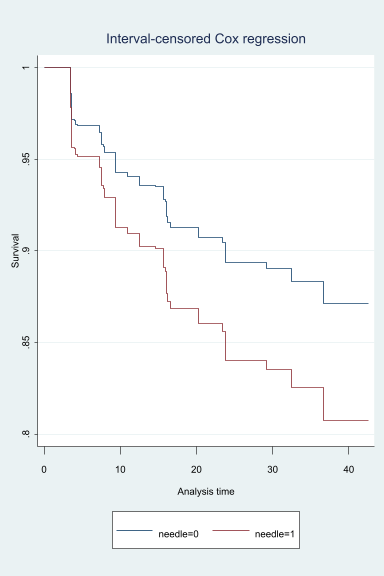

In [32]:
stata.run('''
predict bs_l bs_u, basesurv
stcurve, survival at(needle=(0 1))
''', quietly=True)
#replicates %%stata -qui 

In [33]:
stata.run('''
stcurve, survival at(needle=(0 1))
graph export stcurve.png, replace
''', inline=False)
#replicates %%stata -nogr


. 
. stcurve, survival at(needle=(0 1))

. graph export stcurve.png, replace
(file stcurve.png not found)
file stcurve.png written in PNG format

. 


In [34]:
# just import baseline survivor variables back into Python
baselines = stata.nparray_from_data(var="bs_l bs_u", missingval=-999)

In [35]:
#or, just import the patients who have shared needles from the first 100 observations
needle100 = stata.pdataframe_from_data(selectvar='needle', obs=range(100))

In [36]:
#refer to the lower endpoint of the baseline survivor function
baselines[:,0]

array([0.87102968, 0.89354628, 0.87102968, ..., 0.95689958, 0.90434688,
       0.97132963])

In [37]:
needle100.head

<bound method NDFrame.head of     var1  var2  needle  var4  var5      ltime          rtime       var8  \
0   49.0   1.0     1.0   1.0   1.0   0.000000   4.131147e+00  17.538256   
1   21.0   1.0     1.0   0.0   0.0  11.639344  8.988466e+307 -10.461744   
2   43.0   1.0     1.0   0.0   0.0  40.065575  8.988466e+307  11.538256   
3   42.0   0.0     1.0   1.0   1.0  20.098360  8.988466e+307  10.538256   
4   22.0   1.0     1.0   0.0   0.0  40.098362  8.988466e+307  -9.461744   
5   35.0   1.0     1.0   1.0   1.0  26.786884  8.988466e+307   3.538256   
6   29.0   1.0     1.0   1.0   1.0   7.147541  8.988466e+307  -2.461744   
7   35.0   1.0     1.0   0.0   0.0  27.475410  8.988466e+307   3.538256   
8   23.0   0.0     1.0   1.0   0.0  23.147541  8.988466e+307  -8.461744   
9   27.0   1.0     1.0   0.0   0.0  23.147541  8.988466e+307  -4.461744   
10  23.0   1.0     1.0   1.0   1.0   3.672131  8.988466e+307  -8.461744   
11  24.0   0.0     1.0   1.0   1.0  23.868853  8.988466e+307  -7.46174

In [38]:
# Load all e-returned results into Python
e = stata.get_ereturn()

e

{'e(emtolerance)': 3.57651933372e-06,
 'e(emiterate)': 296.0,
 'e(tolerance)': 1e-06,
 'e(epsilon)': 1e-06,
 'e(converged)': 1.0,
 'e(ic)': 296.0,
 'e(rank)': 1.0,
 'e(p)': 0.012219213303774077,
 'e(chi2)': 6.278780872182784,
 'e(df_m)': 1.0,
 'e(ll)': -605.4761970828787,
 'e(k_dv)': 2.0,
 'e(k_eq_model)': 1.0,
 'e(k_eq)': 1.0,
 'e(k)': 2.0,
 'e(N_int)': 92.0,
 'e(N_rc)': 991.0,
 'e(N_lc)': 41.0,
 'e(N_unc)': 0.0,
 'e(N)': 1124.0,
 'e(vcetolerance)': 1e-06,
 'e(vceiterate)': 5000.0,
 'e(noemhsgtolerance)': 0.0,
 'e(emhsgtolerance)': 3.11559887692e-08,
 'e(emltolerance)': 9.67506268359e-08,
 'e(cmdline)': 'stintcox i.needle, interval(ltime rtime) nolog',
 'e(cmd)': 'stintcox',
 'e(depvar)': 'ltime rtime',
 'e(title2)': 'Baseline hazard: Reduced intervals',
 'e(title)': 'Interval-censored Cox regression',
 'e(chi2type)': 'Wald',
 'e(vcetype)': 'OPG',
 'e(vce)': 'opg',
 'e(stepsize)': 'adaptive',
 'e(predict)': 'stintcox_p',
 'e(_coef_table_props)': 'censored groupvar',
 'e(marginsok)': '

In [39]:
# Report different types of censoring
print("There are %2.0f subjects who did not test positive for HIV-1 by the last visit, resulting in right-censored observations.\nThere are %2.0f subjects who tested positive for HIV-1 at their first follow-up, resulting in left-censored observations. \nThe remaining %2.0f subjects are interval-censored."
      % (e['e(N_rc)'], e['e(N_lc)'], e['e(N_int)']))

There are 991 subjects who did not test positive for HIV-1 by the last visit, resulting in right-censored observations.
There are 41 subjects who tested positive for HIV-1 at their first follow-up, resulting in left-censored observations. 
The remaining 92 subjects are interval-censored.


In [40]:
# Or just load the results you need
stata.run("stintcox i.needle, interval(ltime rtime) nolog", quietly=True)
beta = stata.get_return()['r(table)'][0,1]

print("Patients with a history of needle sharing had a %2.0f%% increased risk of HIV infection." % ((beta-1)*100))

Patients with a history of needle sharing had a 55% increased risk of HIV infection.


#### sfi module
You can also access specific returned results through the sfi module. For example:

In [45]:
from sfi import Scalar, Matrix
n_rc = Scalar.getValue('e(N_rc)')
n_lc = Scalar.getValue('e(N_lc)')
n_int = Scalar.getValue('e(N_int)')

Or, from our earlier example

In [48]:
group_count = np.array(Matrix.get(e(group_count)))


NameError: name 'group_count' is not defined

In [49]:
group_count = np.array(Matrix.get('e(group_count)'))


ValueError: matrix e(group_count) not found

In [47]:
group_count = np.array(Matrix.get(dideret['e(group_count)']))
# will store e(group_count) in Python as a NumPy array named group_count

TypeError: argument 1 must be str, not numpy.ndarray